**Путешествие по Спрингфилду.**


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 ![alt text](https://vignette.wikia.nocookie.net/simpsons/images/5/5a/Spider_fat_piglet.png/revision/latest/scale-to-width-down/640?cb=20111118140828)



# Установка зависимостей

In [ ]:
!pip install -U torch torchvision

In [ ]:
!pip install wheel==0.34.2 # Тут не обязательно перезапускать

  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.0
    Uninstalling wheel-0.37.0:
      Successfully uninstalled wheel-0.37.0


In [ ]:
# установка подходящей версии torch

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu110/torch-0.4.1-cp37-cp37m-linux_x86_64.whl
ERROR: Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu110/torch-0.4.1-cp37-cp37m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu110/torch-0.4.1-cp37-cp37m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu110/torch-0.4.1-cp37-cp37m-linux_x86_64.whl


In [ ]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
!pip uninstall -y Pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

Found existing installation: Pillow 7.1.2
Uninstalling Pillow-7.1.2:
  Successfully uninstalled Pillow-7.1.2
     |████████████████████████████████| 2.0 MB 5.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 5.3.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!unzip /content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/journey-springfield.zip -d journey-springfield

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1025.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1026.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1027.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1028.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1029.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1030.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1031.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1032.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1033.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1034.jpg  
  inflating: journey-springfield/train/simpsons_dataset/moe_szyslak/pic_1035.jpg  
  inflating: journe

In [ ]:
!ls journey-springfield

characters_illustration.png  sample_submission.csv  testset  train


In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Mon Nov 29 07:55:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    29W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [ ]:
!pip install https://github.com/CellProfiling/HPA-Cell-Segmentation/archive/master.zip # Без этого ниже код не заработает 
# Тут перезапустить

     / 17 kB 681 kB/s
     | 131 kB 1.7 MB/s
     |████████████████████████████████| 3.3 MB 5.5 MB/s 
     |████████████████████████████████| 60.3 MB 1.5 MB/s 
     |████████████████████████████████| 3.1 MB 36.1 MB/s 
  Created wheel for hpacellseg: filename=hpacellseg-0.1.8-py3-none-any.whl size=14961 sha256=23ca389600214dede361586c27d786eb4c5a43ad1bba0555bc43ba04e48292cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-5gp2b3ed/wheels/cd/d8/de/04ad08802d62537f8dffc89b6a7ce0a53c3d29ea6eae522ab1
  Created wheel for pytorch-zoo: filename=pytorch_zoo-0.0.0-py3-none-any.whl size=30138 sha256=1456f78b27c820a90cc42f294b7bf549c42415343f9e3fa92721222505dbc9cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-5gp2b3ed/wheels/58/0e/c7/567928a140c7cb2533c59bdc81fded8fe720ea8caad1659d8c
Successfully built hpacellseg pytorch-zoo
  Attempting uninstall: pillow
    Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Attempting unins

In [ ]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path
import torch

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


# Baseline model

In [ ]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} $, <br>       константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [ ]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [ ]:
TRAIN_DIR = Path('journey-springfield/train')
TEST_DIR = Path('journey-springfield/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [ ]:
val_dataset = SimpsonsDataset(val_files, mode='val')

In [ ]:
# uncomment if you have problem with pillow
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions): 
#     for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

Давайте посмотрим на наших героев внутри датасета.

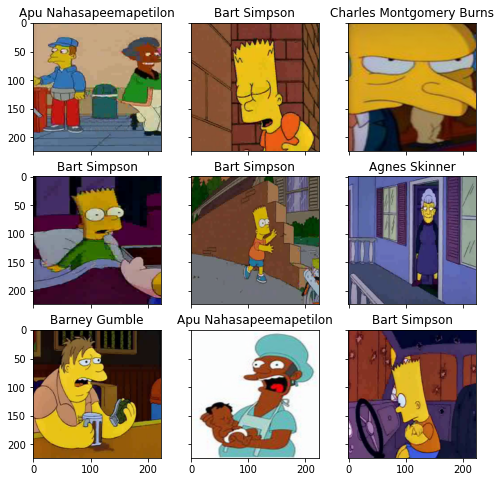

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True) # sharey=True - Убирает лишние метки по оси x
for fig_x in ax.flatten():                        # sharex=True - Убирает лишние метки по оси y
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

### Построение нейросети

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [ ]:
# Очень простая сеть
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        model.train()
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

we will classify :42
SimpleCnn(
  (conv1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=2400, out_fea

Запустим обучение сети.

In [ ]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=2, batch_size=64)

epoch:   0%|          | 0/2 [00:00<?, ?it/s]

loss 2.7576728479005217


epoch:  50%|█████     | 1/2 [03:06<03:06, 186.80s/it]


Epoch 001 train_loss: 2.7577     val_loss 2.1493 train_acc 0.2334 val_acc 0.4167
loss 1.6598230856407583


epoch: 100%|██████████| 2/2 [06:13<00:00, 186.54s/it]


Epoch 002 train_loss: 1.6598     val_loss 1.3569 train_acc 0.5530 val_acc 0.6391


Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

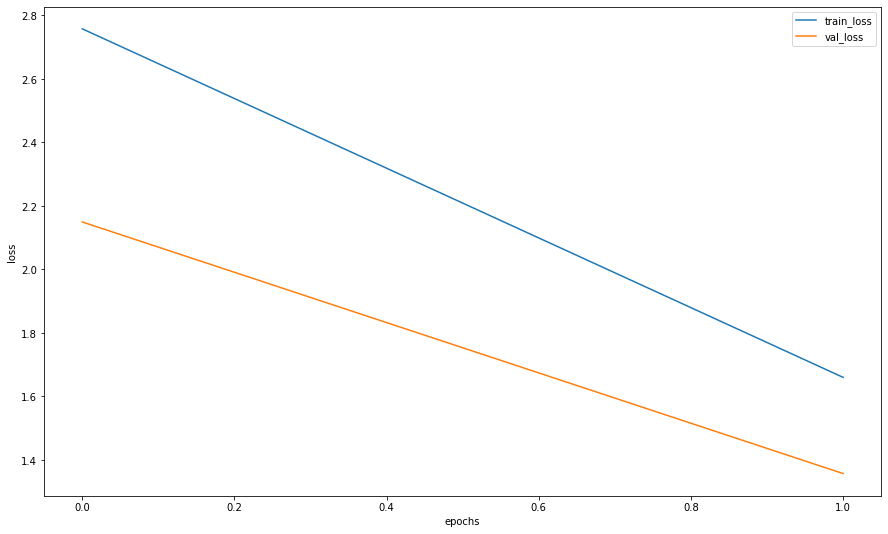

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [ ]:
actual_labels
act_labels_prvd = [label_encoder.classes_[i] for i in actual_labels]

In [ ]:
act_labels_prvd

['abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'bart_simpson',
 'charles_montgomery_burns',
 'bart_simpson',
 'charles_montgomery_burns',
 'bart_simpson',
 'apu_nahasapeemapetilon',
 'apu_nahasapeemapetilon',
 'abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'apu_nahasapeemapetilon',
 'abraham_grampa_simpson',
 'abraham_grampa_simpson',
 'abraham_grampa_simpson',
 'abraham_grampa_simpson',
 'barney_gumble']

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

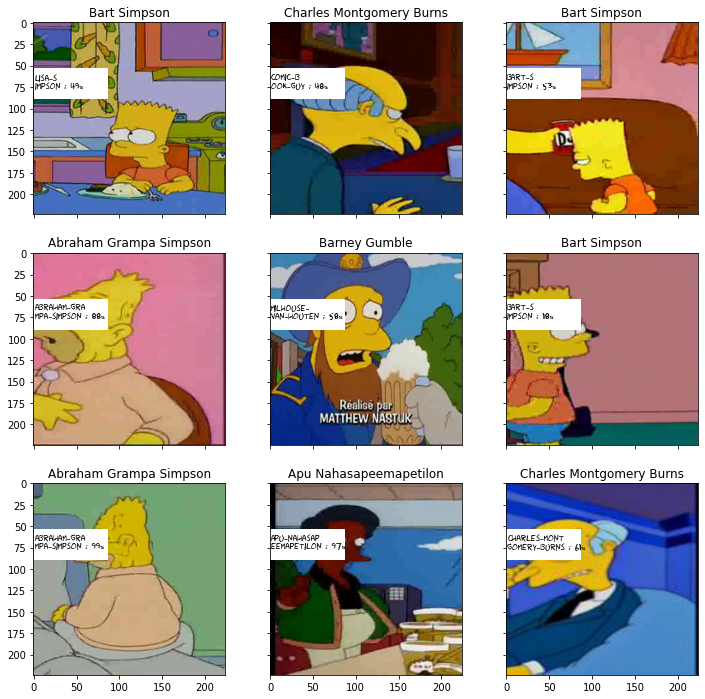

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
   
     

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(simple_cnn, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)


Далее я попробую улучшить модель с помощью аугментации и различных преобразований 

# Improving models

Здесь будут написаны общие функции которые будут использовать в дальнейшем

## Общие функции

- Функция для расчета метрики f1-score различными способами

In [ ]:
from sklearn.metrics import f1_score

def get_f1_score(act_labels, preds_label):

    f1_micro = f1_score(act_labels_prvd, preds_label, average='micro')
    f1_macro = f1_score(act_labels_prvd, preds_label, average='macro')
    f1_weight = f1_score(act_labels_prvd, preds_label, average='weighted')

    print(f'f1 score(micro) = {round(f1_micro, 4)}')
    print(f'f1 score(macro) = {round(f1_macro, 4)}')
    print(f'f1 score(weight) = {round(f1_weight, 4)}')

- Функция для предсказания на валидационной выборке (для расчета f1-score)

In [ ]:
def val_predict(model, val_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in val_loader:
            inputs = inputs[0]
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

- Функция для получения предсказаний

In [ ]:
def get_test_filenames(dataset=None,  
                       cnn=None,
                       f_test_files=None, 
                       batch_size=128,
                       f_label_encoder=None):

    if f_label_encoder is None:
        label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

    if f_test_files is None:
        test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

    test_dataset = AugmentSimpsonsDataset(test_files, mode="test")
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
    probs = predict(cnn, test_loader)

    preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
    test_filenames = [path.name for path in test_dataset.files]

    return preds, test_filenames

- Функция для сохранения результатов

In [ ]:
import pandas as pd

def save_submit(test_filenames=None, 
                preds=None,
                read_path='/content/journey-springfield/sample_submission.csv', 
                save_path=None):

    my_submit = pd.read_csv(read_path)
    my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
    my_submit.to_csv(save_path, index=False)

    return my_submit

## Аугментации

### Примененим горзинт_аугмнт

#### Обучение и предикт

- Переопределим класс 

In [ ]:
class AugmentSimpsonsDataset(SimpsonsDataset):
    def __init__(self, files, mode, augmt_tfs=None):
        super().__init__(files, mode)
        self.augmt_tfs = augmt_tfs

    def __getitem__(self, index):

        if self.mode == 'train':
            transform = self.augmt_tfs

        if self.mode == 'val' or self.mode == 'test':
            transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)

        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

- Разделим на тестовую и трановую выборку

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

- Зададим transforms и датасеты

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
])

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')

- Обучение

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=8, batch_size=128)

epoch:   0%|          | 0/8 [00:00<?, ?it/s]

loss 2.747104202609843


epoch:  12%|█▎        | 1/8 [02:47<19:29, 167.11s/it]


Epoch 001 train_loss: 2.7471     val_loss 2.2321 train_acc 0.2394 val_acc 0.3942
loss 1.875369309688026


epoch:  25%|██▌       | 2/8 [05:34<16:45, 167.55s/it]


Epoch 002 train_loss: 1.8754     val_loss 1.5897 train_acc 0.4881 val_acc 0.5722
loss 1.3771801558685375


epoch:  38%|███▊      | 3/8 [08:22<13:57, 167.48s/it]


Epoch 003 train_loss: 1.3772     val_loss 1.3401 train_acc 0.6262 val_acc 0.6414
loss 1.0847097161135268


epoch:  50%|█████     | 4/8 [11:11<11:13, 168.32s/it]


Epoch 004 train_loss: 1.0847     val_loss 1.1917 train_acc 0.7015 val_acc 0.6792
loss 0.9007260808709914


epoch:  62%|██████▎   | 5/8 [14:11<08:36, 172.21s/it]


Epoch 005 train_loss: 0.9007     val_loss 1.0181 train_acc 0.7526 val_acc 0.7264
loss 0.7473976714488495


epoch:  75%|███████▌  | 6/8 [17:11<05:50, 175.08s/it]


Epoch 006 train_loss: 0.7474     val_loss 0.9495 train_acc 0.7888 val_acc 0.7507
loss 0.6497506792890516


epoch:  88%|████████▊ | 7/8 [20:13<02:57, 177.35s/it]


Epoch 007 train_loss: 0.6498     val_loss 0.9005 train_acc 0.8146 val_acc 0.7677
loss 0.5609540743990016


epoch: 100%|██████████| 8/8 [23:14<00:00, 174.34s/it]


Epoch 008 train_loss: 0.5610     val_loss 0.8449 train_acc 0.8416 val_acc 0.7772


- Визуализируем лосы

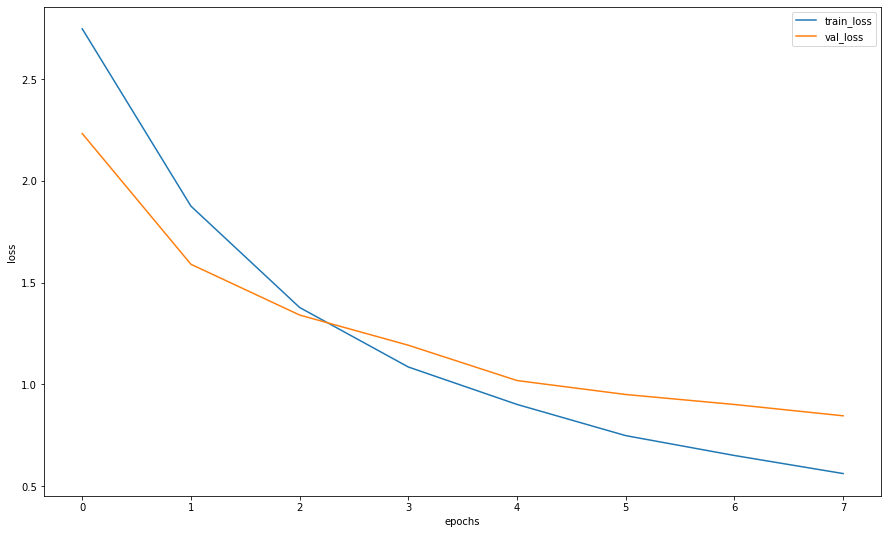

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

val_dataset = AugmentSimpsonsDataset(val_files, mode="val")
val_loader = DataLoader(val_dataset, shuffle=False, batch_size=256)
probs = val_predict(simple_cnn, val_loader)
label_preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))

actual_labels = [val_dataset[id][1] for id in range(len(val_dataset))]
act_labels_prvd = [label_encoder.classes_[i] for i in actual_labels]

- Сделаем предикт на тестовых данных

In [ ]:
preds, test_filenames = get_test_filenames(dataset=AugmentSimpsonsDataset, cnn=simple_cnn, batch_size=128)

- Сохраним предсказания

In [ ]:
save_path = '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/simple_cnn_aygment_gorizont.csv'

save_submit(test_filenames=test_filenames, preds=preds, save_path=save_path)

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
...,...,...
986,img987.jpg,nelson_muntz
987,img988.jpg,homer_simpson
988,img989.jpg,charles_montgomery_burns
989,img99.jpg,chief_wiggum


#### Score

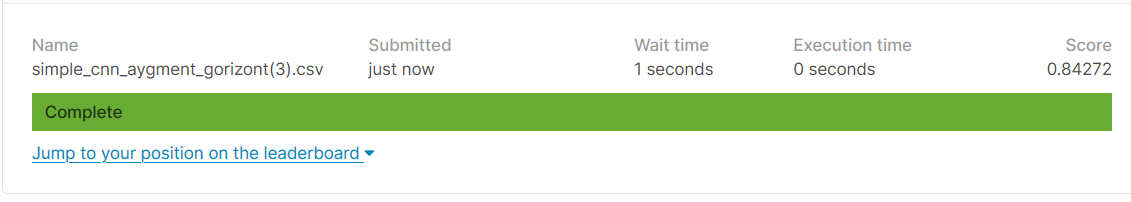

### Обычный_проход + Горизнт_аугментация

#### Обучение и предикт

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
])

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)

val_dataset = SimpsonsDataset(val_files, mode='val')
train_dataset = SimpsonsDataset(train_files, mode='train')
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=4, batch_size=128)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=4, batch_size=128)

epoch:   0%|          | 0/4 [00:00<?, ?it/s]

loss 2.819581048383372


epoch:  25%|██▌       | 1/4 [08:16<24:50, 496.82s/it]


Epoch 001 train_loss: 2.8196     val_loss 2.2453 train_acc 0.2117 val_acc 0.3882
loss 1.8862216860194503


epoch:  50%|█████     | 2/4 [16:10<16:06, 483.03s/it]


Epoch 002 train_loss: 1.8862     val_loss 1.6306 train_acc 0.4859 val_acc 0.5676
loss 1.3414771202772513


epoch:  75%|███████▌  | 3/4 [24:07<08:00, 480.56s/it]


Epoch 003 train_loss: 1.3415     val_loss 1.2809 train_acc 0.6312 val_acc 0.6676
loss 0.9772990659108032


epoch: 100%|██████████| 4/4 [32:02<00:00, 480.67s/it]



Epoch 004 train_loss: 0.9773     val_loss 1.0800 train_acc 0.7278 val_acc 0.7132


epoch:   0%|          | 0/4 [00:00<?, ?it/s]

loss 0.8974378058633817


epoch:  25%|██▌       | 1/4 [07:56<23:49, 476.52s/it]


Epoch 001 train_loss: 0.8974     val_loss 0.9676 train_acc 0.7558 val_acc 0.7501
loss 0.7159558683757198


epoch:  50%|█████     | 2/4 [15:54<15:55, 477.61s/it]


Epoch 002 train_loss: 0.7160     val_loss 0.8928 train_acc 0.7995 val_acc 0.7732
loss 0.5864527075068496


epoch:  75%|███████▌  | 3/4 [23:54<07:58, 478.60s/it]


Epoch 003 train_loss: 0.5865     val_loss 0.8716 train_acc 0.8355 val_acc 0.7858
loss 0.4974211381988105


epoch: 100%|██████████| 4/4 [31:53<00:00, 478.28s/it]


Epoch 004 train_loss: 0.4974     val_loss 0.8899 train_acc 0.8602 val_acc 0.7904


- Визуализируем лосы

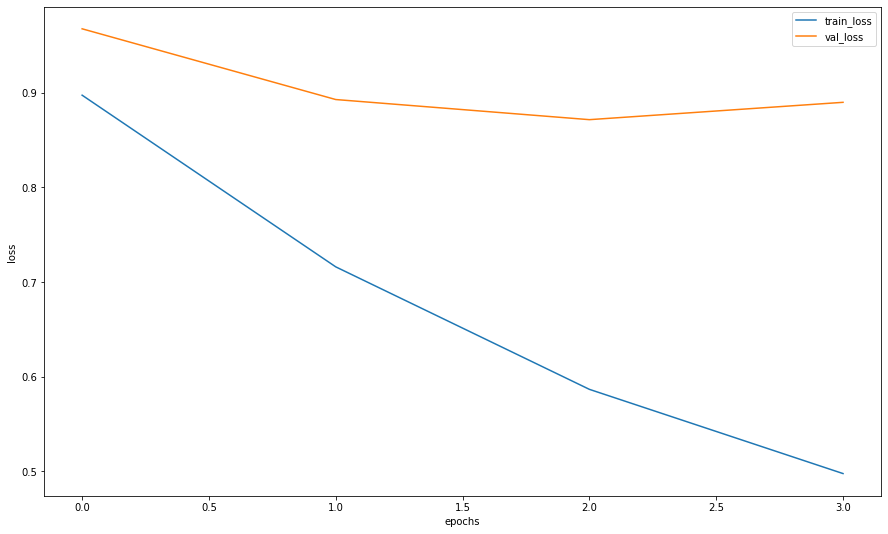

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

- Сделаем предикт на валидационных данных для расчета f1-score

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

val_dataset = AugmentSimpsonsDataset(val_files, mode="val")
val_loader = DataLoader(val_dataset, shuffle=False, batch_size=256)
probs = val_predict(simple_cnn, val_loader)
label_preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))

actual_labels = [val_dataset[id][1] for id in range(len(val_dataset))]
act_labels_prvd = [label_encoder.classes_[i] for i in actual_labels]

- Рассчитаем f1-score

In [ ]:
get_f1_score(act_labels_prvd, label_preds)

f1 score(micro) = 0.7904
f1 score(macro) = 0.6394
f1 score(weight) = 0.7886


- Сделаем предикт на тестовых данных

In [ ]:
preds, test_filenames = get_test_filenames(dataset=AugmentSimpsonsDataset, cnn=simple_cnn, batch_size=128)

- Сохраним предсказания

In [ ]:
save_path = '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/simple_cnn_usual_approach_aygment_gorizont.csv'

save_submit(test_filenames=test_filenames, preds=preds, save_path=save_path)

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
...,...,...
986,img987.jpg,nelson_muntz
987,img988.jpg,principal_skinner
988,img989.jpg,charles_montgomery_burns
989,img99.jpg,chief_wiggum


#### Score

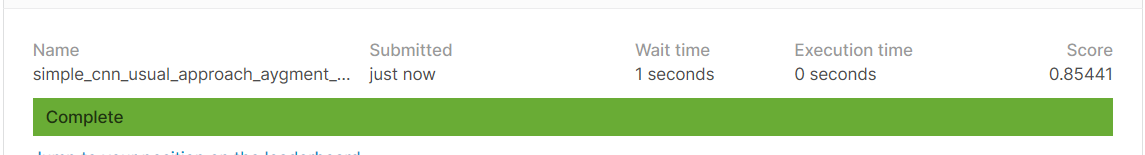

### Обычный_проход + Горизнт_аугментация+ lr



- Переопределим функцию train, чтобы можно было в параметрах указать оптимизатор

In [ ]:
def train(train_files, val_files, model, epochs, batch_size, optimizer):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = optimizer
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))

    return history

#### Обучение и предикт

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
])

In [ ]:
def train(train_files, val_files, model, epochs, batch_size, mdl_opt):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = mdl_opt
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    return history

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)

val_dataset = SimpsonsDataset(val_files, mode='val')
train_dataset = SimpsonsDataset(train_files, mode='train')

optimizer = torch.optim.Adam(simple_cnn.parameters(), lr=3*0.001) #, lr=1e-2

history = train(train_dataset, val_dataset, model=simple_cnn, epochs=4, batch_size=128, mdl_opt=optimizer)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=4, batch_size=128, mdl_opt=optimizer)

epoch:   0%|          | 0/4 [00:00<?, ?it/s]

loss 2.8181298039082363


epoch:  25%|██▌       | 1/4 [02:54<08:44, 174.77s/it]


Epoch 001 train_loss: 2.8181     val_loss 2.3556 train_acc 0.1984 val_acc 0.3554
loss 1.89795715782747


epoch:  50%|█████     | 2/4 [05:49<05:50, 175.00s/it]


Epoch 002 train_loss: 1.8980     val_loss 1.5881 train_acc 0.4852 val_acc 0.5774
loss 1.2526303327298483


epoch:  75%|███████▌  | 3/4 [08:43<02:54, 174.33s/it]


Epoch 003 train_loss: 1.2526     val_loss 1.2572 train_acc 0.6574 val_acc 0.6674
loss 0.9010180167023775


epoch: 100%|██████████| 4/4 [11:37<00:00, 174.45s/it]



Epoch 004 train_loss: 0.9010     val_loss 1.1106 train_acc 0.7488 val_acc 0.7115


epoch:   0%|          | 0/4 [00:00<?, ?it/s]

loss 0.8749570578471499


epoch:  25%|██▌       | 1/4 [02:56<08:47, 176.00s/it]


Epoch 001 train_loss: 0.8750     val_loss 1.0377 train_acc 0.7653 val_acc 0.7272
loss 0.7171643548075869


epoch:  50%|█████     | 2/4 [05:52<05:51, 175.99s/it]


Epoch 002 train_loss: 0.7172     val_loss 0.9398 train_acc 0.8050 val_acc 0.7625
loss 0.6284823907629776


epoch:  75%|███████▌  | 3/4 [08:48<02:56, 176.10s/it]


Epoch 003 train_loss: 0.6285     val_loss 0.8624 train_acc 0.8279 val_acc 0.7797
loss 0.5258058649911661


epoch: 100%|██████████| 4/4 [11:45<00:00, 176.31s/it]


Epoch 004 train_loss: 0.5258     val_loss 0.9053 train_acc 0.8518 val_acc 0.7831


### Обычный_проход + Горизнт_аугментация + sheduler


#### Обучение и предикт

In [ ]:
def train(train_files, val_files, model, epochs, batch_size, mdl_opt, mdl_sheduler):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = mdl_opt
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt, mdl_sheduler)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history
    

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer, mdl_sheduler=None):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        model.train()
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)

    mdl_sheduler.step()

    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    
    return train_loss, train_acc

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
])

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)

In [ ]:
from torch.optim import lr_scheduler

val_dataset = SimpsonsDataset(val_files, mode='val')
train_dataset = SimpsonsDataset(train_files, mode='train')

optimizer = torch.optim.Adam(simple_cnn.parameters(), lr=1e-3)
scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

history = train(train_dataset, val_dataset, model=simple_cnn, epochs=3, batch_size=128, mdl_opt=optimizer, mdl_sheduler=scheduler)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')

optimizer = torch.optim.Adam(simple_cnn.parameters(), lr=1e-3)
scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

history = train(train_dataset, val_dataset, model=simple_cnn, epochs=4, batch_size=128, mdl_opt=optimizer, mdl_sheduler=scheduler)

epoch:   0%|          | 0/4 [00:00<?, ?it/s]

loss 2.8436817417130196


epoch:  25%|██▌       | 1/4 [03:01<09:05, 181.77s/it]


Epoch 001 train_loss: 2.8437     val_loss 2.2160 train_acc 0.2031 val_acc 0.3921
loss 1.846484169207361


epoch:  50%|█████     | 2/4 [06:03<06:03, 181.81s/it]


Epoch 002 train_loss: 1.8465     val_loss 1.5644 train_acc 0.4909 val_acc 0.5780
loss 1.2259752514316926


epoch:  75%|███████▌  | 3/4 [09:02<03:00, 180.66s/it]


Epoch 003 train_loss: 1.2260     val_loss 1.2422 train_acc 0.6597 val_acc 0.6618
loss 0.9628275414357269


epoch: 100%|██████████| 4/4 [12:01<00:00, 180.49s/it]



Epoch 004 train_loss: 0.9628     val_loss 1.0817 train_acc 0.7335 val_acc 0.7094


epoch:   0%|          | 0/4 [00:00<?, ?it/s]

loss 0.9167702614907983


epoch:  25%|██▌       | 1/4 [03:03<09:11, 183.87s/it]


Epoch 001 train_loss: 0.9168     val_loss 1.0033 train_acc 0.7516 val_acc 0.7287
loss 0.8259932583923955


epoch:  50%|█████     | 2/4 [06:06<06:06, 183.39s/it]


Epoch 002 train_loss: 0.8260     val_loss 0.9469 train_acc 0.7731 val_acc 0.7451
loss 0.726162517512708


epoch:  75%|███████▌  | 3/4 [09:05<03:01, 181.05s/it]


Epoch 003 train_loss: 0.7262     val_loss 0.9095 train_acc 0.7997 val_acc 0.7589
loss 0.6779919393435125


epoch: 100%|██████████| 4/4 [12:04<00:00, 181.11s/it]


Epoch 004 train_loss: 0.6780     val_loss 0.8926 train_acc 0.8139 val_acc 0.7596


- Сделаем предикт на валидационных данных для расчета f1-score

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

val_dataset = AugmentSimpsonsDataset(val_files, mode="val")
val_loader = DataLoader(val_dataset, shuffle=False, batch_size=256)
probs = val_predict(simple_cnn, val_loader)
label_preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))

actual_labels = [val_dataset[id][1] for id in range(len(val_dataset))]
act_labels_prvd = [label_encoder.classes_[i] for i in actual_labels]

- Рассчитаем f1-score

In [ ]:
get_f1_score(act_labels_prvd, label_preds)

f1 score(micro) = 0.7596
f1 score(macro) = 0.6245
f1 score(weight) = 0.7555


Как мы видим это нам не помогло

Попробуем теперь воспользовать сетью resnet

# Resnet

## Resnet101

### Обучение и предикт

In [ ]:
from torchvision import models 
import torchvision

In [ ]:
models_resnet101 = models.resnet101(pretrained=True)
models_resnet101

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
num_features = 2048
n_classes = len(np.unique(train_val_labels))
models_resnet101.fc = nn.Linear(num_features, n_classes, bias=True)

Обучать будем все слои с разным lr

In [ ]:
optimizer = torch.optim.AdamW( params=[
        {"params": models_resnet101.conv1.parameters(), "lr": 1e-6},
        {"params": models_resnet101.bn1.parameters(), "lr": 1e-6},
        {"params": models_resnet101.maxpool.parameters(), "lr": 1e-6},
        {"params": models_resnet101.layer3.parameters(), "lr": 1e-6},
        {"params": models_resnet101.layer2.parameters(), "lr": 1e-5},
        {"params": models_resnet101.layer1.parameters(), "lr": 1e-4},
        {"params": models_resnet101.fc.parameters()},
    ], 
    lr=1e-3, amsgrad=True
)

In [ ]:
models_resnet101 = models_resnet101.cuda()

for param in models_resnet101.parameters():
    param.requires_grad = True

Пройдёмся по 5-ти эпохам

In [ ]:
from torch.optim import lr_scheduler


scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

val_dataset = SimpsonsDataset(val_files, mode='val')
train_dataset = SimpsonsDataset(train_files, mode='train')

history = train(train_dataset, val_dataset, model=models_resnet101, epochs=5, batch_size=64, mdl_opt=optimizer, mdl_sheduler=scheduler)

epoch:   0%|          | 0/5 [00:00<?, ?it/s]

loss 1.4964179033853118


epoch:  20%|██        | 1/5 [12:29<49:59, 749.99s/it]


Epoch 001 train_loss: 1.4964     val_loss 0.6959 train_acc 0.6535 val_acc 0.8345
loss 0.4809875914652459


epoch:  40%|████      | 2/5 [25:02<37:34, 751.46s/it]


Epoch 002 train_loss: 0.4810     val_loss 0.4316 train_acc 0.8848 val_acc 0.8972
loss 0.2810878943526386


epoch:  60%|██████    | 3/5 [37:33<25:02, 751.42s/it]


Epoch 003 train_loss: 0.2811     val_loss 0.3508 train_acc 0.9350 val_acc 0.9113
loss 0.18982331098574454


epoch:  80%|████████  | 4/5 [50:01<12:29, 749.89s/it]


Epoch 004 train_loss: 0.1898     val_loss 0.2835 train_acc 0.9557 val_acc 0.9234
loss 0.11789474503099026


epoch: 100%|██████████| 5/5 [1:02:27<00:00, 749.54s/it]


Epoch 005 train_loss: 0.1179     val_loss 0.2562 train_acc 0.9752 val_acc 0.9295


In [ ]:
# torch.save(models_resnet101.state_dict(), '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_AdamW_Aug_e5.pth')

In [ ]:
models_resnet101.load_state_dict(torch.load('/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_AdamW_Aug_e5.pth'))

<All keys matched successfully>

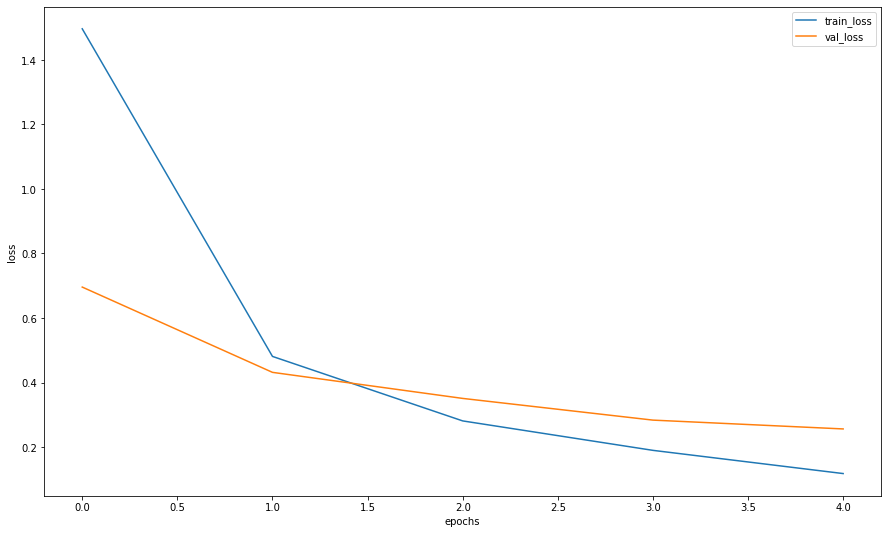

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Добавим аугментации

In [ ]:
RESCALE_SIZE = 256

In [ ]:
class AugmentSimpsonsDataset(SimpsonsDataset):
    def __init__(self, files, mode, augmt_tfs=None):
        super().__init__(files, mode)
        self.augmt_tfs = augmt_tfs

    def __getitem__(self, index):

        if self.mode == 'train':
            transform = self.augmt_tfs

        if self.mode == 'val' or self.mode == 'test':
            transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)

        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomRotation(degrees=(-10, 10), expand=True),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomResizedCrop(244),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
])

In [ ]:
optimizer = torch.optim.AdamW( params=[
        {"params": models_resnet101.conv1.parameters(), "lr": 1e-6},
        {"params": models_resnet101.bn1.parameters(), "lr": 1e-6},
        {"params": models_resnet101.maxpool.parameters(), "lr": 1e-6},
        {"params": models_resnet101.layer3.parameters(), "lr": 1e-6},
        {"params": models_resnet101.layer2.parameters(), "lr": 1e-5},
        {"params": models_resnet101.layer1.parameters(), "lr": 1e-4},
        {"params": models_resnet101.fc.parameters()},
    ], 
    lr=1e-3, amsgrad=True
)

In [ ]:
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')

history = train(train_dataset, val_dataset, model=models_resnet101, epochs=5, batch_size=64, mdl_opt=optimizer, mdl_sheduler=scheduler)

epoch:   0%|          | 0/5 [00:00<?, ?it/s]

loss 0.935328681291733


epoch:  20%|██        | 1/5 [17:01<1:08:05, 1021.26s/it]


Epoch 001 train_loss: 0.9353     val_loss 0.2608 train_acc 0.7504 val_acc 0.9305
loss 0.7560287677897747


epoch:  40%|████      | 2/5 [34:07<51:12, 1024.32s/it]


Epoch 002 train_loss: 0.7560     val_loss 0.2330 train_acc 0.7979 val_acc 0.9408
loss 0.6575050903616517


epoch:  60%|██████    | 3/5 [51:10<34:06, 1023.42s/it]


Epoch 003 train_loss: 0.6575     val_loss 0.2236 train_acc 0.8222 val_acc 0.9394
loss 0.6446961601628369


epoch:  80%|████████  | 4/5 [1:08:07<17:01, 1021.07s/it]


Epoch 004 train_loss: 0.6447     val_loss 0.2160 train_acc 0.8230 val_acc 0.9419
loss 0.5922977796815233


epoch: 100%|██████████| 5/5 [1:25:08<00:00, 1021.76s/it]


Epoch 005 train_loss: 0.5923     val_loss 0.1923 train_acc 0.8385 val_acc 0.9478


In [ ]:
torch.save(models_resnet101.state_dict(), '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_AdamW_Aug_e10.pth')

- Визуализируем лосы

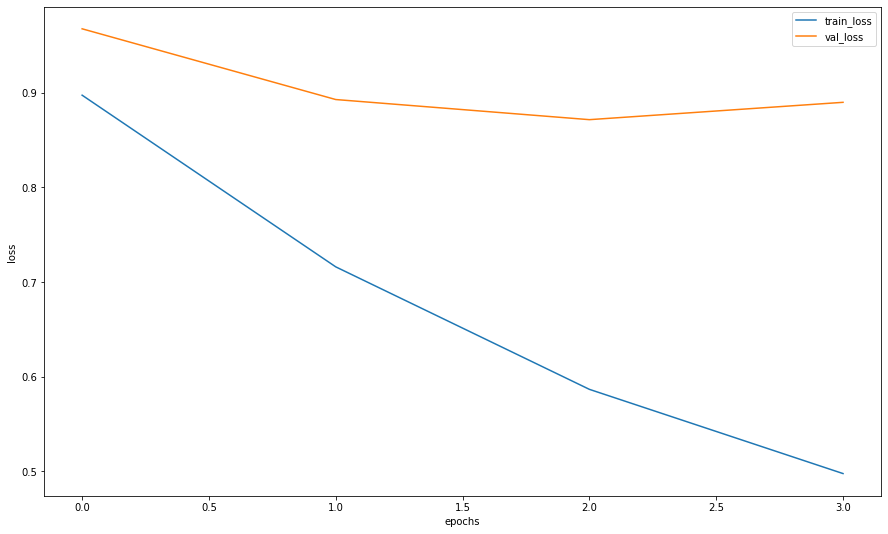

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

- Сделаем предикт на валидационных данных для расчета f1-score

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

val_dataset = AugmentSimpsonsDataset(val_files, mode="val")
val_loader = DataLoader(val_dataset, shuffle=False, batch_size=256)
probs = val_predict(models_resnet101, val_loader)
label_preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))

actual_labels = [val_dataset[id][1] for id in range(len(val_dataset))]
act_labels_prvd = [label_encoder.classes_[i] for i in actual_labels]

- Рассчитаем f1-score

In [ ]:
get_f1_score(act_labels_prvd, label_preds)

f1 score(micro) = 0.8915
f1 score(macro) = 0.6579
f1 score(weight) = 0.8865


- Сделаем предикт на тестовых данных

In [ ]:
preds, test_filenames = get_test_filenames(dataset=AugmentSimpsonsDataset, cnn=models_resnet101, batch_size=64)

- Сохраним предсказания

In [ ]:
save_path = '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/resnet101_e10.csv'

save_submit(test_filenames=test_filenames, preds=preds, save_path=save_path)

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
...,...,...
986,img987.jpg,nelson_muntz
987,img988.jpg,chief_wiggum
988,img989.jpg,charles_montgomery_burns
989,img99.jpg,chief_wiggum


### Score

## Resnet101_баланс_классов

В датасете классы несбалансированы поэтому попробуем сбалансировать

In [ ]:
from torchvision import models 
import torchvision

In [ ]:
models_resnet101 = models.resnet101(pretrained=True)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
num_features = 2048
n_classes = len(np.unique(train_val_labels))
models_resnet101.fc = nn.Linear(num_features, n_classes, bias=True)

In [ ]:
optimizer = torch.optim.AdamW( params=[
        {"params": models_resnet101.conv1.parameters(), "lr": 1e-6},
        {"params": models_resnet101.bn1.parameters(), "lr": 1e-6},
        {"params": models_resnet101.maxpool.parameters(), "lr": 1e-6},
        {"params": models_resnet101.layer3.parameters(), "lr": 1e-6},
        {"params": models_resnet101.layer2.parameters(), "lr": 1e-5},
        {"params": models_resnet101.layer1.parameters(), "lr": 1e-4},
        {"params": models_resnet101.fc.parameters()},
    ], 
    lr=1e-3, amsgrad=True
)

In [ ]:
models_resnet101 = models_resnet101.cuda()

for param in models_resnet101.parameters():
    param.requires_grad = True

In [ ]:
models_resnet101.load_state_dict(torch.load('/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_AdamW_Aug_e10.pth'))

<All keys matched successfully>

In [ ]:
class AugmentSimpsonsDataset(SimpsonsDataset):
    def __init__(self, files, mode, augmt_tfs=None):
        super().__init__(files, mode)
        self.augmt_tfs = augmt_tfs

    def __getitem__(self, index):

        if self.mode == 'train':
            transform = self.augmt_tfs

        if self.mode == 'val' or self.mode == 'test':
            transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)

        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler, WeightedRandomSampler

val_dataset = AugmentSimpsonsDataset(val_files, mode='val')
train_dataset = AugmentSimpsonsDataset(train_files, mode='train')


train_dataset = SimpsonsDataset(val_files, mode='train')
# val_dataset = SimpsonsDataset(val_files, mode='val')
train_label = [train_dataset[id][1] for id in range(len(train_dataset))]
# val_label = [val_dataset[id][1] for id in range(len(val_dataset))]
# labels = np.array(train_label + val_label)
labels = np.array(train_label)
class_sample_count = np.array([len(np.where(labels==t)[0]) for t in np.unique(labels)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in labels])
samples_weight = torch.from_numpy(samples_weight)

In [ ]:
def train(train_files, val_files, model, epochs, batch_size, mdl_opt, mdl_sheduler):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = mdl_opt
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt, mdl_sheduler)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history
    

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer, mdl_sheduler=None):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        model.train()
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)

    mdl_sheduler.step()

    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    
    return train_loss, train_acc

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomRotation(degrees=(-10, 10), expand=True),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomResizedCrop(244),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
])

In [ ]:
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')

history = train(train_dataset, val_dataset, model=models_resnet101, epochs=8, batch_size=64, mdl_opt=optimizer, mdl_sheduler=scheduler)

epoch:   0%|          | 0/8 [00:00<?, ?it/s]

loss 0.5929526265119016


epoch:  12%|█▎        | 1/8 [16:41<1:56:53, 1001.94s/it]


Epoch 001 train_loss: 0.5930     val_loss 0.1633 train_acc 0.8406 val_acc 0.9547
loss 0.5544743752948827


epoch:  25%|██▌       | 2/8 [33:20<1:39:58, 999.73s/it]


Epoch 002 train_loss: 0.5545     val_loss 0.1653 train_acc 0.8497 val_acc 0.9568
loss 0.5469464005307868


epoch:  38%|███▊      | 3/8 [49:57<1:23:12, 998.58s/it]


Epoch 003 train_loss: 0.5469     val_loss 0.1671 train_acc 0.8518 val_acc 0.9536
loss 0.5198366057417926


epoch:  50%|█████     | 4/8 [1:06:37<1:06:37, 999.34s/it]


Epoch 004 train_loss: 0.5198     val_loss 0.1643 train_acc 0.8588 val_acc 0.9545
loss 0.4948372436493125


epoch:  62%|██████▎   | 5/8 [1:23:19<50:00, 1000.16s/it]


Epoch 005 train_loss: 0.4948     val_loss 0.1525 train_acc 0.8636 val_acc 0.9591
loss 0.49310569117760855


epoch:  75%|███████▌  | 6/8 [1:39:54<33:16, 998.50s/it]


Epoch 006 train_loss: 0.4931     val_loss 0.1571 train_acc 0.8685 val_acc 0.9568
loss 0.4872009569015068


epoch:  88%|████████▊ | 7/8 [1:56:29<16:37, 997.22s/it]


Epoch 007 train_loss: 0.4872     val_loss 0.1561 train_acc 0.8683 val_acc 0.9562
loss 0.488804156336198


epoch: 100%|██████████| 8/8 [2:13:08<00:00, 998.56s/it]


Epoch 008 train_loss: 0.4888     val_loss 0.1546 train_acc 0.8712 val_acc 0.9557


In [ ]:
torch.save(models_resnet101.state_dict(), '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_18e.pth')

In [ ]:
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')

history = train(train_dataset, val_dataset, model=models_resnet101, epochs=8, batch_size=64, mdl_opt=optimizer, mdl_sheduler=scheduler)

epoch:   0%|          | 0/8 [00:00<?, ?it/s]

loss 0.4712771043305762


epoch:  12%|█▎        | 1/8 [16:47<1:57:35, 1007.91s/it]


Epoch 001 train_loss: 0.4713     val_loss 0.1548 train_acc 0.8740 val_acc 0.9585
loss 0.471981015398788


epoch:  25%|██▌       | 2/8 [33:40<1:41:04, 1010.72s/it]


Epoch 002 train_loss: 0.4720     val_loss 0.1506 train_acc 0.8741 val_acc 0.9587
loss 0.45086948993221365


epoch:  38%|███▊      | 3/8 [50:31<1:24:13, 1010.79s/it]


Epoch 003 train_loss: 0.4509     val_loss 0.1522 train_acc 0.8760 val_acc 0.9572
loss 0.4616947223011935


epoch:  50%|█████     | 4/8 [1:07:22<1:07:23, 1010.97s/it]


Epoch 004 train_loss: 0.4617     val_loss 0.1463 train_acc 0.8725 val_acc 0.9597
loss 0.4556051619881027


epoch:  62%|██████▎   | 5/8 [1:24:09<50:27, 1009.33s/it]


Epoch 005 train_loss: 0.4556     val_loss 0.1519 train_acc 0.8756 val_acc 0.9591
loss 0.46262318622201054


epoch:  75%|███████▌  | 6/8 [1:40:54<33:35, 1007.88s/it]


Epoch 006 train_loss: 0.4626     val_loss 0.1496 train_acc 0.8754 val_acc 0.9595
loss 0.4560598093857089


epoch:  88%|████████▊ | 7/8 [1:57:43<16:48, 1008.26s/it]


Epoch 007 train_loss: 0.4561     val_loss 0.1490 train_acc 0.8787 val_acc 0.9599
loss 0.45154587423693593


epoch: 100%|██████████| 8/8 [2:14:33<00:00, 1009.18s/it]


Epoch 008 train_loss: 0.4515     val_loss 0.1505 train_acc 0.8792 val_acc 0.9608


In [ ]:
torch.save(models_resnet101.state_dict(), '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_26e.pth')

### ДОобучение

In [ ]:
from torchvision import models 
import torchvision

In [ ]:
models_resnet101 = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
num_features = 2048
n_classes = len(np.unique(train_val_labels))
models_resnet101.fc = nn.Linear(num_features, n_classes, bias=True)

In [ ]:
models_resnet101 = models_resnet101.cuda()

for param in models_resnet101.parameters():
    param.requires_grad = True

In [ ]:
def train(train_files, val_files, model, epochs, batch_size, mdl_opt, mdl_sheduler):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = mdl_opt
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt, mdl_sheduler)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history
    

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer, mdl_sheduler=None):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        model.train()
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)

    mdl_sheduler.step()

    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    
    return train_loss, train_acc

In [ ]:
class AugmentSimpsonsDataset(SimpsonsDataset):
    def __init__(self, files, mode, augmt_tfs=None):
        super().__init__(files, mode)
        self.augmt_tfs = augmt_tfs

    def __getitem__(self, index):

        if self.mode == 'train':
            transform = self.augmt_tfs

        if self.mode == 'val' or self.mode == 'test':
            transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)

        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomRotation(degrees=(-10, 10), expand=True),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomResizedCrop(244),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
])

In [ ]:
models_resnet101.load_state_dict(torch.load('/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_26e.pth'))

<All keys matched successfully>

In [ ]:
optimizer = torch.optim.AdamW( params=[
        {"params": models_resnet101.conv1.parameters(), "lr": 1e-7},
        {"params": models_resnet101.bn1.parameters(), "lr": 1e-7},
        {"params": models_resnet101.maxpool.parameters(), "lr": 1e-7},
        {"params": models_resnet101.layer3.parameters(), "lr": 1e-7},
        {"params": models_resnet101.layer2.parameters(), "lr": 1e-6},
        {"params": models_resnet101.layer1.parameters(), "lr": 1e-4},
        {"params": models_resnet101.fc.parameters()},
    ], 
    lr=1e-4, amsgrad=True
)

In [ ]:
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')

history = train(train_dataset, val_dataset, model=models_resnet101, epochs=5, batch_size=64, mdl_opt=optimizer, mdl_sheduler=scheduler)

epoch:   0%|          | 0/5 [00:00<?, ?it/s]

loss 0.47127349498723903


epoch:  20%|██        | 1/5 [16:46<1:07:07, 1006.91s/it]


Epoch 001 train_loss: 0.4713     val_loss 0.1273 train_acc 0.8716 val_acc 0.9647
loss 0.4753976439535941


epoch:  40%|████      | 2/5 [33:26<50:08, 1002.85s/it]


Epoch 002 train_loss: 0.4754     val_loss 0.1286 train_acc 0.8711 val_acc 0.9627
loss 0.4704832382563292


epoch:  60%|██████    | 3/5 [50:05<33:21, 1000.78s/it]


Epoch 003 train_loss: 0.4705     val_loss 0.1256 train_acc 0.8716 val_acc 0.9639
loss 0.45253737844990444


epoch:  80%|████████  | 4/5 [1:06:44<16:39, 999.98s/it]


Epoch 004 train_loss: 0.4525     val_loss 0.1233 train_acc 0.8771 val_acc 0.9652
loss 0.4543586132826186


epoch: 100%|██████████| 5/5 [1:23:24<00:00, 1000.90s/it]


Epoch 005 train_loss: 0.4544     val_loss 0.1265 train_acc 0.8794 val_acc 0.9633


In [ ]:
torch.save(models_resnet101.state_dict(), '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_31e.pth')

In [ ]:
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')

history = train(train_dataset, val_dataset, model=models_resnet101, epochs=5, batch_size=64, mdl_opt=optimizer, mdl_sheduler=scheduler)

epoch:   0%|          | 0/5 [00:00<?, ?it/s]

loss 0.45533408432927464


epoch:  20%|██        | 1/5 [16:41<1:06:44, 1001.05s/it]


Epoch 001 train_loss: 0.4553     val_loss 0.1268 train_acc 0.8769 val_acc 0.9641
loss 0.45184169136283425


epoch:  40%|████      | 2/5 [33:21<50:02, 1000.98s/it]


Epoch 002 train_loss: 0.4518     val_loss 0.1254 train_acc 0.8778 val_acc 0.9652
loss 0.449686799186287


epoch:  60%|██████    | 3/5 [50:04<33:23, 1001.52s/it]


Epoch 003 train_loss: 0.4497     val_loss 0.1223 train_acc 0.8797 val_acc 0.9660
loss 0.44195507527635436


epoch:  80%|████████  | 4/5 [1:06:43<16:40, 1000.83s/it]


Epoch 004 train_loss: 0.4420     val_loss 0.1221 train_acc 0.8820 val_acc 0.9650
loss 0.44976075337070803


epoch: 100%|██████████| 5/5 [1:23:22<00:00, 1000.50s/it]


Epoch 005 train_loss: 0.4498     val_loss 0.1227 train_acc 0.8777 val_acc 0.9662


In [ ]:
torch.save(models_resnet101.state_dict(), '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_36e.pth')

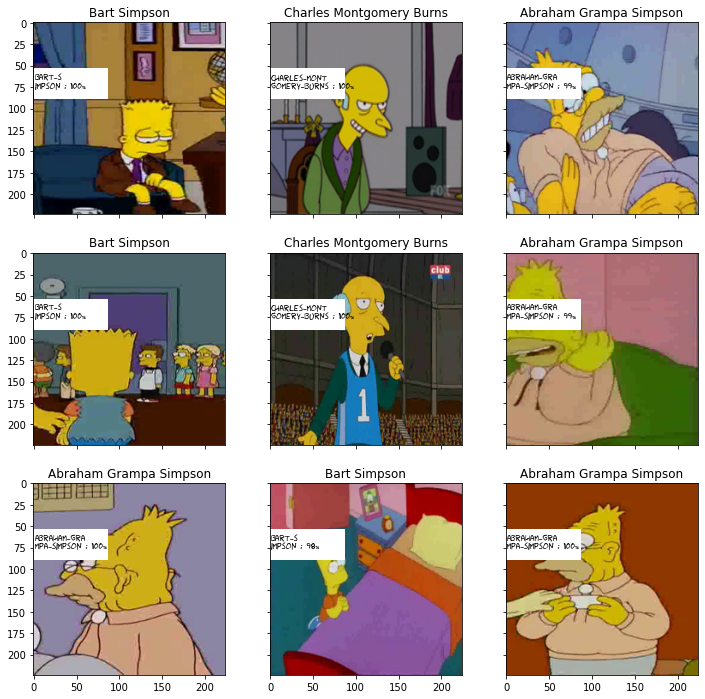

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
   
     

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(models_resnet101, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

## Дообучение на балансированных классах 

In [ ]:
from torchvision import models 
import torchvision

models_resnet101 = models.resnet101(pretrained=True)

num_features = 2048
n_classes = len(np.unique(train_val_labels))
models_resnet101.fc = nn.Linear(num_features, n_classes, bias=True)

models_resnet101 = models_resnet101.cuda()

for param in models_resnet101.parameters():
    param.requires_grad = True

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
class AugmentSimpsonsDataset(SimpsonsDataset):
    def __init__(self, files, mode, augmt_tfs=None):
        super().__init__(files, mode)
        self.augmt_tfs = augmt_tfs

    def __getitem__(self, index):

        if self.mode == 'train':
            transform = self.augmt_tfs

        if self.mode == 'val' or self.mode == 'test':
            transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)

        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
        transforms.ToTensor(),
        # transforms.RandomRotation(degrees=(-10, 10), expand=True),
        transforms.RandomHorizontalFlip(p=0.5),
        # transforms.RandomResizedCrop(244),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
])

In [ ]:
models_resnet101.load_state_dict(torch.load('/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/Models/models_resnet101_36e.pth'))

<All keys matched successfully>

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler, WeightedRandomSampler

val_dataset = AugmentSimpsonsDataset(val_files, mode='val')
train_dataset = AugmentSimpsonsDataset(train_files, mode='train')


train_dataset = SimpsonsDataset(train_files, mode='train')
# val_dataset = SimpsonsDataset(val_files, mode='val')
train_label = [train_dataset[id][1] for id in range(len(train_dataset))]
# val_label = [val_dataset[id][1] for id in range(len(val_dataset))]
# labels = np.array(train_label + val_label)
labels = np.array(train_label)
class_sample_count = np.array([len(np.where(labels==t)[0]) for t in np.unique(labels)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in labels])
samples_weight = torch.from_numpy(samples_weight)

In [ ]:
def train(train_files, val_files, model, epochs, batch_size, mdl_opt, mdl_sheduler):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, 
                              sampler=WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight)), num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = mdl_opt
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt, mdl_sheduler)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history
    

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer, mdl_sheduler=None):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        model.train()
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)

    mdl_sheduler.step()

    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    
    return train_loss, train_acc

In [ ]:
optimizer = torch.optim.AdamW( params=[
        {"params": models_resnet101.conv1.parameters(), "lr": 1e-7},
        {"params": models_resnet101.bn1.parameters(), "lr": 1e-7},
        {"params": models_resnet101.maxpool.parameters(), "lr": 1e-7},
        {"params": models_resnet101.layer3.parameters(), "lr": 1e-7},
        {"params": models_resnet101.layer2.parameters(), "lr": 1e-6},
        {"params": models_resnet101.layer1.parameters(), "lr": 1e-4},
        {"params": models_resnet101.fc.parameters()},
    ], 
    lr=1e-4, amsgrad=True
)

In [ ]:
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.25)

train_dataset = AugmentSimpsonsDataset(train_files, mode='train', augmt_tfs=transform)
val_dataset = AugmentSimpsonsDataset(val_files, mode='val')

history = train(train_dataset, val_dataset, model=models_resnet101, epochs=3, batch_size=64, mdl_opt=optimizer, mdl_sheduler=scheduler)

epoch:   0%|          | 0/3 [00:00<?, ?it/s]

loss 0.06970142524947376


epoch:  33%|███▎      | 1/3 [10:12<20:24, 612.42s/it]


Epoch 001 train_loss: 0.0697     val_loss 0.1172 train_acc 0.9861 val_acc 0.9742
loss 0.06277454576243092


epoch:  67%|██████▋   | 2/3 [20:24<10:12, 612.23s/it]


Epoch 002 train_loss: 0.0628     val_loss 0.1083 train_acc 0.9894 val_acc 0.9748
loss 0.05243065765696928


epoch: 100%|██████████| 3/3 [30:38<00:00, 612.91s/it]


Epoch 003 train_loss: 0.0524     val_loss 0.1069 train_acc 0.9910 val_acc 0.9765


In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

val_dataset = AugmentSimpsonsDataset(val_files, mode="val")
val_loader = DataLoader(val_dataset, shuffle=False, batch_size=256)
probs = val_predict(models_resnet101, val_loader)
label_preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))

actual_labels = [val_dataset[id][1] for id in range(len(val_dataset))]
act_labels_prvd = [label_encoder.classes_[i] for i in actual_labels]

In [ ]:
get_f1_score(act_labels_prvd, label_preds)

f1 score(micro) = 0.9742
f1 score(macro) = 0.9552
f1 score(weight) = 0.9745


- Сделаем предикт на тестовых данных

In [ ]:
preds, test_filenames = get_test_filenames(dataset=AugmentSimpsonsDataset, cnn=models_resnet101, batch_size=64)

- Сохраним предсказания

In [ ]:
save_path = '/content/gdrive/MyDrive/Course_stepic_NN/Classification_picture/Home_work/resnet101_e42_bl.csv'

save_submit(test_filenames=test_filenames, preds=preds, save_path=save_path)

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
...,...,...
986,img987.jpg,nelson_muntz
987,img988.jpg,charles_montgomery_burns
988,img989.jpg,charles_montgomery_burns
989,img99.jpg,chief_wiggum


In [ ]:
srav = save_submit(test_filenames=test_filenames, preds=preds, save_path=save_path)

In [ ]:
srav

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon
...,...,...
986,img987.jpg,nelson_muntz
987,img988.jpg,charles_montgomery_burns
988,img989.jpg,charles_montgomery_burns
989,img99.jpg,chief_wiggum
